# Proyek Analisis Sentimen
Notebook ini berisi analisis sentimen berdasarkan data ulasan dari aplikasi Shopee.

# Import Library

In [2]:
!pip install Sastrawi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import string

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import LabelEncoder


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D, Conv1D, GlobalMaxPooling1D, Bidirectional, MaxPooling1D, Flatten, GRU, SimpleRNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam



import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt', download_dir='/content/nltk_data')
nltk.data.path.append('/content/nltk_data')
nltk.download('stopwords' , download_dir='/content/nltk_data')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.
import requests
import csv
from io import StringIO
import tensorflow as tf
from google.colab import drive
from nltk.corpus import stopwords
import nltk.corpus


[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
nltk.download('punkt_tab', download_dir='/content/nltk_data')

[nltk_data] Downloading package punkt_tab to /content/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Loading Dataset

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
file_path = '/content/drive/MyDrive/AI/Laskar AI/dataset/senimen analisis/shopee_reviews.csv'

In [7]:
# Membaca file CSV ke dalam DataFrame
data = pd.read_csv(file_path)

# Menampilkan DataFrame sebagai tabel
data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9868ccf0-c62f-4794-a005-f1b6f7fe8727,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,keren,5,0,2.98.10,2025-04-06 04:47:03,"Hii kak Abdul Roni Parman, makasih ya buat rev...",2025-04-06 05:37:39,2.98.10
1,4165e35f-cc40-48c1-8c08-22f444f339db,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap,4,0,3.47.39,2025-04-06 04:45:34,"Hi Kak Denz_ Ragil06 , terimakasih ya bintangn...",2025-04-06 05:40:54,3.47.39
2,09209647-8db6-4eab-8e6f-f99d9abf2689,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat membantu sekali,5,0,3.46.37,2025-04-06 04:44:39,"Hi Kak Ahmad Fauzen , makasih ya buat bintang ...",2025-04-06 05:44:56,3.46.37
3,8bce6afc-4580-4dda-9967-b45ff12dddf4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat baik makasih shopee,5,0,3.46.37,2025-04-06 04:44:28,"Hi Kak Martawi Tawi , makasih ya buat bintang ...",2025-04-06 05:08:59,3.46.37
4,138be952-72b4-466c-aac0-40c4446f791c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,belanja di shopee untung nyah banyak,4,0,3.45.60,2025-04-06 04:44:16,"Hi Kak Wawan Hermawan , terimakasih ya bintang...",2025-04-06 05:03:13,3.45.60
...,...,...,...,...,...,...,...,...,...,...,...
29995,8104e640-577d-4f32-bde9-e5a8e7bd9a2b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,dikira paket gw bola apa ya di oper opee bolak...,1,0,3.45.60,2025-03-16 20:53:57,"Hai kak Fadlan Uceng , maaf ya udah bikin kam...",2025-03-16 21:44:39,3.45.60
29996,95fe7f28-6229-4c2a-9e75-f8057885e80d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,JELEKKK,1,0,NaN,2025-03-16 20:52:40,NaN,NaN,NaN
29997,00fa5706-bfbe-4dab-b7db-696ad41452a3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"shopee bagus, cuman pengirimannya astaghfirull...",1,0,NaN,2025-03-16 20:52:24,"Hai kak Khoirul Nisa , maaf ya udah bikin kam...",2025-03-16 21:42:22,NaN
29998,68ec0dd1-4625-4eee-b15b-a1234fa8602f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantul,5,0,3.45.60,2025-03-16 20:52:14,"Hi kak Revi Mila , makasih banget nih buat re...",2025-03-16 21:43:01,3.45.60


In [8]:
# Menampilkan informasi tentang DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              30000 non-null  object
 1   userName              30000 non-null  object
 2   userImage             30000 non-null  object
 3   content               30000 non-null  object
 4   score                 30000 non-null  int64 
 5   thumbsUpCount         30000 non-null  int64 
 6   reviewCreatedVersion  23802 non-null  object
 7   at                    30000 non-null  object
 8   replyContent          27308 non-null  object
 9   repliedAt             27308 non-null  object
 10  appVersion            23802 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.5+ MB


Cek Misiing value

In [9]:
# Menghitung dan menampilkan nilai NaN
missing_data = data.isna().sum()  # Menampilkan jumlah NaN per kolom
print(missing_data)

reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    6198
at                         0
replyContent            2692
repliedAt               2692
appVersion              6198
dtype: int64


Handle missing value

Setelah melakukan pengecekan terhadap data yang hilang (missing data), langkah berikutnya adalah menghapus baris-baris yang mengandung nilai NaN guna memastikan analisis data berjalan akurat tanpa dipengaruhi oleh ketidaklengkapan data.

In [10]:
# Menghapus baris yang memiliki nilai NaN pada seluruh kolom
data.dropna(inplace=True)

# Cek kembali untuk memastikan tidak ada nilai NaN yang tersisa
print(data.isna().sum())

reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
replyContent            0
repliedAt               0
appVersion              0
dtype: int64


Fungsi dropna() pada cell di atas digunakan untuk menghapus baris-baris yang mengandung nilai kosong (NaN). Tujuannya adalah untuk memastikan bahwa dataset yang digunakan dalam analisis sentimen bebas dari data yang tidak lengkap, sehingga dapat membantu meningkatkan kualitas dan akurasi model yang dibangun.

In [11]:
data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9868ccf0-c62f-4794-a005-f1b6f7fe8727,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,keren,5,0,2.98.10,2025-04-06 04:47:03,"Hii kak Abdul Roni Parman, makasih ya buat rev...",2025-04-06 05:37:39,2.98.10
1,4165e35f-cc40-48c1-8c08-22f444f339db,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap,4,0,3.47.39,2025-04-06 04:45:34,"Hi Kak Denz_ Ragil06 , terimakasih ya bintangn...",2025-04-06 05:40:54,3.47.39
2,09209647-8db6-4eab-8e6f-f99d9abf2689,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat membantu sekali,5,0,3.46.37,2025-04-06 04:44:39,"Hi Kak Ahmad Fauzen , makasih ya buat bintang ...",2025-04-06 05:44:56,3.46.37
3,8bce6afc-4580-4dda-9967-b45ff12dddf4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat baik makasih shopee,5,0,3.46.37,2025-04-06 04:44:28,"Hi Kak Martawi Tawi , makasih ya buat bintang ...",2025-04-06 05:08:59,3.46.37
4,138be952-72b4-466c-aac0-40c4446f791c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,belanja di shopee untung nyah banyak,4,0,3.45.60,2025-04-06 04:44:16,"Hi Kak Wawan Hermawan , terimakasih ya bintang...",2025-04-06 05:03:13,3.45.60
...,...,...,...,...,...,...,...,...,...,...,...
29988,9af60df0-b1de-46d0-afa2-8130df865943,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mantab 👍,5,0,3.41.45,2025-03-16 21:01:53,"Hai kak, Makasih banyak ya untuk review dan bi...",2025-03-16 22:09:11,3.41.45
29989,a98fbe5c-6ad1-40af-8b6f-b4222ea2f9f0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Membantu bgt dlm berbelanja untuk emak2 yg sibuk,5,0,3.44.26,2025-03-16 21:01:45,"Hai kak, Makasih banyak ya untuk review dan bi...",2025-03-16 22:28:28,3.44.26
29994,30caa1c9-54df-49f1-a1fe-04c116865e07,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,good,5,0,3.45.60,2025-03-16 20:54:27,"Hi kak aulia shinta , makasih banget nih buat...",2025-03-16 21:40:49,3.45.60
29995,8104e640-577d-4f32-bde9-e5a8e7bd9a2b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,dikira paket gw bola apa ya di oper opee bolak...,1,0,3.45.60,2025-03-16 20:53:57,"Hai kak Fadlan Uceng , maaf ya udah bikin kam...",2025-03-16 21:44:39,3.45.60


In [12]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = data.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

Menghapus kolom yang tidak relevan untuk di analisis

In [13]:
# Hapus kolom pada DataFrame
df = clean_df.drop(columns=['reviewId',             # ID ulasan, tidak relevan
    'userName',             # Nama pengguna, tidak penting
    'userImage',            # URL gambar pengguna, tidak berguna
    'thumbsUpCount',        # Jumlah like ulasan, tidak perlu
    'reviewCreatedVersion', # Versi aplikasi saat ulasan dibuat, opsional
    'at',                   # Tanggal ulasan dibuat, opsional
    'replyContent',         # Balasan dari developer, tidak relevan
    'repliedAt',            # Tanggal balasan developer, tidak relevan
    'appVersion' ])



In [14]:
df

,content,score
0,keren,5
1,mantap,4
2,sangat membantu sekali,5
3,sangat baik makasih shopee,5
4,belanja di shopee untung nyah banyak,4
...,...,...
29988,Mantab 👍,5
29989,Membantu bgt dlm berbelanja untuk emak2 yg sibuk,5
29994,good,5
29995,dikira paket gw bola apa ya di oper opee bolak...,1


Menampilkan informasi data yang telah di drop beberapa kolom

In [15]:
# Tampilkan ringkasan informasi
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21688 entries, 0 to 29998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  21688 non-null  object
 1   score    21688 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


# Eksplorasi Data & Visualisasi (Exploratory Data Analysis / EDA) sebelum processing text

score
5    16461
1     2576
4     1495
3      685
2      471
Name: count, dtype: int64


<ipython-input-16-c4d7ad93e8ae>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_counts.index, y=score_counts.values, palette="viridis")


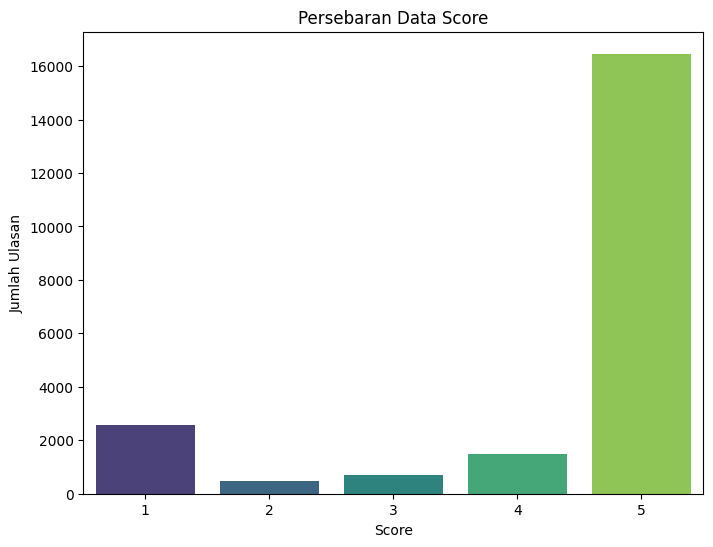

In [16]:
# Menghitung frekuensi setiap nilai score (1-5)
score_counts = df['score'].value_counts()
print(score_counts)

# Visualisasi distribusi score menggunakan bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=score_counts.index, y=score_counts.values, palette="viridis")
plt.title('Persebaran Data Score')
plt.xlabel('Score')
plt.ylabel('Jumlah Ulasan')
plt.show()

- Mayoritas pengguna memberi rating 5 (sekitar 65% dari total), artinya banyak yang sangat puas dengan aplikasi Shopee.

- Namun, terdapat juga cukup banyak rating 1, menunjukkan ada keluhan yang signifikan dari sebagian pengguna.

- Rating 3 ke bawah bisa dianggap sebagai feedback negatif atau netral.

 WordCloud Sebelum Preprocessing

Text(0.5, 1.0, 'WordCloud Ulasan Sebelum Preprocessing')

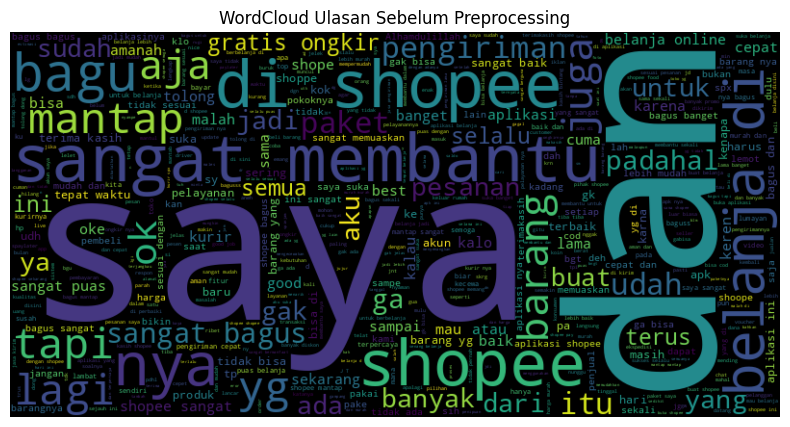

In [17]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Pastikan tidak ada nilai NaN pada kolom 'content'
df['content'] = df['content'].fillna('')

# Menggabungkan semua teks ulasan
text = ' '.join(df['content'].astype(str).tolist())

# Menentukan stopwords tambahan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)
wc.generate(text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud Ulasan Sebelum Preprocessing")

Visualisasi Frekuensi Kata
- Visualisasi frekuensi kata ini menampilkan 10 kata yang paling sering muncul dalam ulasan. Melalui bar plot, kita dapat dengan jelas mengamati sebaran kata-kata yang paling dominan sebelum melanjutkan ke tahap analisis sentimen.

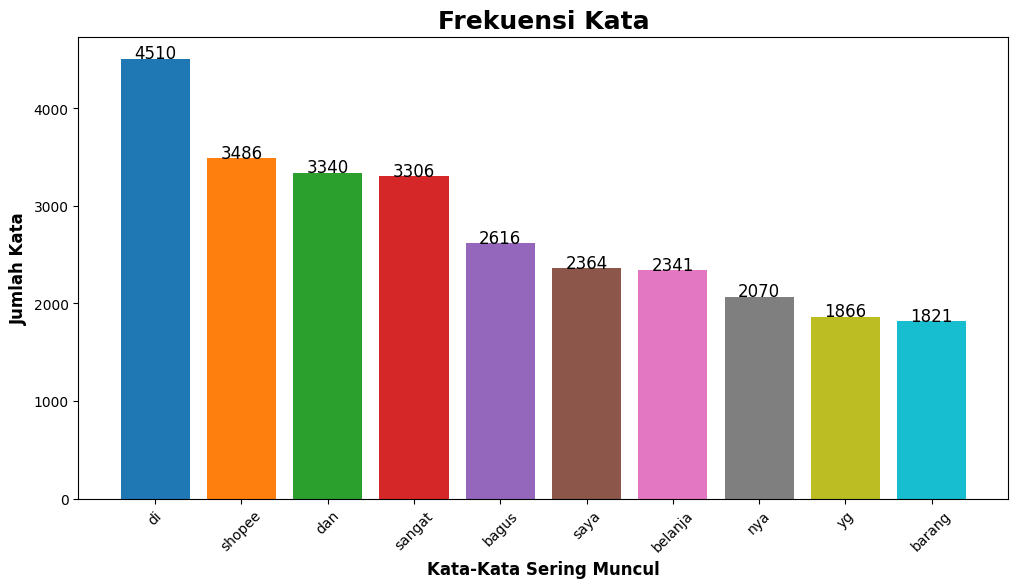

In [18]:
import matplotlib.pyplot as plt
from collections import Counter

# Menggabungkan seluruh teks dari kolom 'content'
text = " ".join(df["content"].astype(str))

# Tokenisasi teks berdasarkan spasi
tokens = text.split()

# Menghitung frekuensi setiap kata
word_counts = Counter(tokens)

# Mengambil 10 kata yang paling sering muncul
top_words = word_counts.most_common(10)

# Memisahkan kata dan jumlahnya
words, counts = zip(*top_words)

# Mendefinisikan palet warna
colors = plt.cm.tab10(range(len(words)))

# Membuat bar plot untuk frekuensi kata
plt.figure(figsize=(12, 6))
bars = plt.bar(words, counts, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan nilai di atas setiap bar
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, count + 1, str(count), fontsize=12, color='black', ha='center')

plt.show()

# Preprocessing Teks

In [19]:
# Mendefinisikan fungsi-fungsi untuk preprocessing text

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers
    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()

    stemmed_words = [stemmer.stem(word) for word in words]

    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [20]:
def preprocess_text(text):
    """
    Membersihkan teks dengan menghapus URL, mengubah ke lowercase, menghapus mention dan hashtag,
    serta menghapus karakter spesial, tanda baca, dan angka.
    """
    # Hapus URL
    text = re.sub(r'https?\S+', ' ', text, flags=re.IGNORECASE)

    # Ubah ke huruf kecil
    text = text.lower()

    # Hapus mention dan hashtag
    text = re.sub(r'[@#]\S+', ' ', text)

    # Hapus karakter spesial dan tanda baca menggunakan modul string
    text = re.sub(r'[{}]'.format(re.escape(string.punctuation)), ' ', text)

    # Hapus angka (jika diperlukan)
    text = re.sub(r'\d+', ' ', text)

    # Hapus extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

Membuat fungsi untuk secara manual mengonversi kata tidak baku (slangwords) ke dalam bentuk kata baku.

In [21]:
# Mendefinisikan fungsi untuk slangwords

slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [22]:
pip install tqdm


In [23]:
df = clean_df

In [24]:
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9868ccf0-c62f-4794-a005-f1b6f7fe8727,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,keren,5,0,2.98.10,2025-04-06 04:47:03,"Hii kak Abdul Roni Parman, makasih ya buat rev...",2025-04-06 05:37:39,2.98.10
1,4165e35f-cc40-48c1-8c08-22f444f339db,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap,4,0,3.47.39,2025-04-06 04:45:34,"Hi Kak Denz_ Ragil06 , terimakasih ya bintangn...",2025-04-06 05:40:54,3.47.39
2,09209647-8db6-4eab-8e6f-f99d9abf2689,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat membantu sekali,5,0,3.46.37,2025-04-06 04:44:39,"Hi Kak Ahmad Fauzen , makasih ya buat bintang ...",2025-04-06 05:44:56,3.46.37
3,8bce6afc-4580-4dda-9967-b45ff12dddf4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat baik makasih shopee,5,0,3.46.37,2025-04-06 04:44:28,"Hi Kak Martawi Tawi , makasih ya buat bintang ...",2025-04-06 05:08:59,3.46.37
4,138be952-72b4-466c-aac0-40c4446f791c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,belanja di shopee untung nyah banyak,4,0,3.45.60,2025-04-06 04:44:16,"Hi Kak Wawan Hermawan , terimakasih ya bintang...",2025-04-06 05:03:13,3.45.60
...,...,...,...,...,...,...,...,...,...,...,...
29988,9af60df0-b1de-46d0-afa2-8130df865943,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mantab 👍,5,0,3.41.45,2025-03-16 21:01:53,"Hai kak, Makasih banyak ya untuk review dan bi...",2025-03-16 22:09:11,3.41.45
29989,a98fbe5c-6ad1-40af-8b6f-b4222ea2f9f0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Membantu bgt dlm berbelanja untuk emak2 yg sibuk,5,0,3.44.26,2025-03-16 21:01:45,"Hai kak, Makasih banyak ya untuk review dan bi...",2025-03-16 22:28:28,3.44.26
29994,30caa1c9-54df-49f1-a1fe-04c116865e07,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,good,5,0,3.45.60,2025-03-16 20:54:27,"Hi kak aulia shinta , makasih banget nih buat...",2025-03-16 21:40:49,3.45.60
29995,8104e640-577d-4f32-bde9-e5a8e7bd9a2b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,dikira paket gw bola apa ya di oper opee bolak...,1,0,3.45.60,2025-03-16 20:53:57,"Hai kak Fadlan Uceng , maaf ya udah bikin kam...",2025-03-16 21:44:39,3.45.60


In [25]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [26]:
# Pastikan kolom 'content' tidak memiliki nilai NaN
df['content'] = df['content'].fillna('')

# Terapkan fungsi preprocess_text dengan integrasi progress bar dari tqdm
df['text_Clean'] = df['content'].progress_apply(preprocess_text)
df

  0%|          | 0/21688 [00:00<?, ?it/s]

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_Clean
0,9868ccf0-c62f-4794-a005-f1b6f7fe8727,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,keren,5,0,2.98.10,2025-04-06 04:47:03,"Hii kak Abdul Roni Parman, makasih ya buat rev...",2025-04-06 05:37:39,2.98.10,keren
1,4165e35f-cc40-48c1-8c08-22f444f339db,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap,4,0,3.47.39,2025-04-06 04:45:34,"Hi Kak Denz_ Ragil06 , terimakasih ya bintangn...",2025-04-06 05:40:54,3.47.39,mantap
2,09209647-8db6-4eab-8e6f-f99d9abf2689,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat membantu sekali,5,0,3.46.37,2025-04-06 04:44:39,"Hi Kak Ahmad Fauzen , makasih ya buat bintang ...",2025-04-06 05:44:56,3.46.37,sangat membantu sekali
3,8bce6afc-4580-4dda-9967-b45ff12dddf4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat baik makasih shopee,5,0,3.46.37,2025-04-06 04:44:28,"Hi Kak Martawi Tawi , makasih ya buat bintang ...",2025-04-06 05:08:59,3.46.37,sangat baik makasih shopee
4,138be952-72b4-466c-aac0-40c4446f791c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,belanja di shopee untung nyah banyak,4,0,3.45.60,2025-04-06 04:44:16,"Hi Kak Wawan Hermawan , terimakasih ya bintang...",2025-04-06 05:03:13,3.45.60,belanja di shopee untung nyah banyak
...,...,...,...,...,...,...,...,...,...,...,...,...
29988,9af60df0-b1de-46d0-afa2-8130df865943,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mantab 👍,5,0,3.41.45,2025-03-16 21:01:53,"Hai kak, Makasih banyak ya untuk review dan bi...",2025-03-16 22:09:11,3.41.45,mantab 👍
29989,a98fbe5c-6ad1-40af-8b6f-b4222ea2f9f0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Membantu bgt dlm berbelanja untuk emak2 yg sibuk,5,0,3.44.26,2025-03-16 21:01:45,"Hai kak, Makasih banyak ya untuk review dan bi...",2025-03-16 22:28:28,3.44.26,membantu bgt dlm berbelanja untuk emak yg sibuk
29994,30caa1c9-54df-49f1-a1fe-04c116865e07,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,good,5,0,3.45.60,2025-03-16 20:54:27,"Hi kak aulia shinta , makasih banget nih buat...",2025-03-16 21:40:49,3.45.60,good
29995,8104e640-577d-4f32-bde9-e5a8e7bd9a2b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,dikira paket gw bola apa ya di oper opee bolak...,1,0,3.45.60,2025-03-16 20:53:57,"Hai kak Fadlan Uceng , maaf ya udah bikin kam...",2025-03-16 21:44:39,3.45.60,dikira paket gw bola apa ya di oper opee bolak...


Membaca Kamus Slang

In [27]:
# Membaca kamus slang dari file Excel
kamus_slang = pd.read_excel(r'/content/drive/MyDrive/AI/Laskar AI/dataset/senimen analisis/kamuskatabaku.xlsx')

# Menyusun kamus slang sebagai dictionary: slang -> kata baku
slang_dict = dict(zip(kamus_slang['tidak_baku'], kamus_slang['kata_baku']))

# Fungsi untuk mengganti slang dengan kata baku
def ganti_slang(teks):
    return ' '.join([slang_dict.get(kata, kata) for kata in teks.split()])

Menerapkan Normalisasi Slang pada Data

In [28]:
# Menerapkan fungsi ganti_slang pada kolom 'text_StopWord'
df['text_Normalization'] = df['text_Clean'].progress_apply(ganti_slang)
df.head()

  0%|          | 0/21688 [00:00<?, ?it/s]

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_Clean,text_Normalization
0,9868ccf0-c62f-4794-a005-f1b6f7fe8727,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,keren,5,0,2.98.10,2025-04-06 04:47:03,"Hii kak Abdul Roni Parman, makasih ya buat rev...",2025-04-06 05:37:39,2.98.10,keren,keren
1,4165e35f-cc40-48c1-8c08-22f444f339db,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap,4,0,3.47.39,2025-04-06 04:45:34,"Hi Kak Denz_ Ragil06 , terimakasih ya bintangn...",2025-04-06 05:40:54,3.47.39,mantap,mantap
2,09209647-8db6-4eab-8e6f-f99d9abf2689,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat membantu sekali,5,0,3.46.37,2025-04-06 04:44:39,"Hi Kak Ahmad Fauzen , makasih ya buat bintang ...",2025-04-06 05:44:56,3.46.37,sangat membantu sekali,sangat membantu sekali
3,8bce6afc-4580-4dda-9967-b45ff12dddf4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat baik makasih shopee,5,0,3.46.37,2025-04-06 04:44:28,"Hi Kak Martawi Tawi , makasih ya buat bintang ...",2025-04-06 05:08:59,3.46.37,sangat baik makasih shopee,sangat baik terima kasih shopee
4,138be952-72b4-466c-aac0-40c4446f791c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,belanja di shopee untung nyah banyak,4,0,3.45.60,2025-04-06 04:44:16,"Hi Kak Wawan Hermawan , terimakasih ya bintang...",2025-04-06 05:03:13,3.45.60,belanja di shopee untung nyah banyak,belanja di shopee untung nya banyak


Penghapusan Stopwords

In [29]:
# Import pustaka nltk dari modul corpus dan download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
# Hapus kata-kata umum (stopwords) menggunakan NLTK
stop = stopwords.words('indonesian')
df['text_StopWord'] = df['text_Normalization'].progress_apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop])
)
df.head()

  0%|          | 0/21688 [00:00<?, ?it/s]

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_Clean,text_Normalization,text_StopWord
0,9868ccf0-c62f-4794-a005-f1b6f7fe8727,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,keren,5,0,2.98.10,2025-04-06 04:47:03,"Hii kak Abdul Roni Parman, makasih ya buat rev...",2025-04-06 05:37:39,2.98.10,keren,keren,keren
1,4165e35f-cc40-48c1-8c08-22f444f339db,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap,4,0,3.47.39,2025-04-06 04:45:34,"Hi Kak Denz_ Ragil06 , terimakasih ya bintangn...",2025-04-06 05:40:54,3.47.39,mantap,mantap,mantap
2,09209647-8db6-4eab-8e6f-f99d9abf2689,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat membantu sekali,5,0,3.46.37,2025-04-06 04:44:39,"Hi Kak Ahmad Fauzen , makasih ya buat bintang ...",2025-04-06 05:44:56,3.46.37,sangat membantu sekali,sangat membantu sekali,membantu
3,8bce6afc-4580-4dda-9967-b45ff12dddf4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat baik makasih shopee,5,0,3.46.37,2025-04-06 04:44:28,"Hi Kak Martawi Tawi , makasih ya buat bintang ...",2025-04-06 05:08:59,3.46.37,sangat baik makasih shopee,sangat baik terima kasih shopee,terima kasih shopee
4,138be952-72b4-466c-aac0-40c4446f791c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,belanja di shopee untung nyah banyak,4,0,3.45.60,2025-04-06 04:44:16,"Hi Kak Wawan Hermawan , terimakasih ya bintang...",2025-04-06 05:03:13,3.45.60,belanja di shopee untung nyah banyak,belanja di shopee untung nya banyak,belanja shopee untung nya


Tokenisasi Teks dengan RegexpTokenizer / word_tokenize

In [31]:

# Menggunakan raw string untuk pola regex agar tidak menghasilkan SyntaxWarning
regexp = RegexpTokenizer(r'\w+')

# Menerapkan tokenisasi pada kolom text_StopWord
df['text_Tokenization'] = df['text_StopWord'].progress_apply(regexp.tokenize)
df.head()

  0%|          | 0/21688 [00:00<?, ?it/s]

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_Clean,text_Normalization,text_StopWord,text_Tokenization
0,9868ccf0-c62f-4794-a005-f1b6f7fe8727,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,keren,5,0,2.98.10,2025-04-06 04:47:03,"Hii kak Abdul Roni Parman, makasih ya buat rev...",2025-04-06 05:37:39,2.98.10,keren,keren,keren,[keren]
1,4165e35f-cc40-48c1-8c08-22f444f339db,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap,4,0,3.47.39,2025-04-06 04:45:34,"Hi Kak Denz_ Ragil06 , terimakasih ya bintangn...",2025-04-06 05:40:54,3.47.39,mantap,mantap,mantap,[mantap]
2,09209647-8db6-4eab-8e6f-f99d9abf2689,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat membantu sekali,5,0,3.46.37,2025-04-06 04:44:39,"Hi Kak Ahmad Fauzen , makasih ya buat bintang ...",2025-04-06 05:44:56,3.46.37,sangat membantu sekali,sangat membantu sekali,membantu,[membantu]
3,8bce6afc-4580-4dda-9967-b45ff12dddf4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat baik makasih shopee,5,0,3.46.37,2025-04-06 04:44:28,"Hi Kak Martawi Tawi , makasih ya buat bintang ...",2025-04-06 05:08:59,3.46.37,sangat baik makasih shopee,sangat baik terima kasih shopee,terima kasih shopee,"[terima, kasih, shopee]"
4,138be952-72b4-466c-aac0-40c4446f791c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,belanja di shopee untung nyah banyak,4,0,3.45.60,2025-04-06 04:44:16,"Hi Kak Wawan Hermawan , terimakasih ya bintang...",2025-04-06 05:03:13,3.45.60,belanja di shopee untung nyah banyak,belanja di shopee untung nya banyak,belanja shopee untung nya,"[belanja, shopee, untung, nya]"


Melakukan Stemming pada Token Teks

In [32]:

%pip install Sastrawi

In [33]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [34]:
# Melakukan stemming dari tokens
df['text_Stemmindo'] = df['text_Tokenization'].progress_apply(lambda x: [stemmer.stem(y) for y in x])

  0%|          | 0/21688 [00:00<?, ?it/s]

In [35]:
# Menampilkan beberapa baris pertama DataFrame untuk memastikan proses stemming telah berjalan dengan benar
df.head(20)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_Clean,text_Normalization,text_StopWord,text_Tokenization,text_Stemmindo
0,9868ccf0-c62f-4794-a005-f1b6f7fe8727,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,keren,5,0,2.98.10,2025-04-06 04:47:03,"Hii kak Abdul Roni Parman, makasih ya buat rev...",2025-04-06 05:37:39,2.98.10,keren,keren,keren,[keren],[keren]
1,4165e35f-cc40-48c1-8c08-22f444f339db,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap,4,0,3.47.39,2025-04-06 04:45:34,"Hi Kak Denz_ Ragil06 , terimakasih ya bintangn...",2025-04-06 05:40:54,3.47.39,mantap,mantap,mantap,[mantap],[mantap]
2,09209647-8db6-4eab-8e6f-f99d9abf2689,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat membantu sekali,5,0,3.46.37,2025-04-06 04:44:39,"Hi Kak Ahmad Fauzen , makasih ya buat bintang ...",2025-04-06 05:44:56,3.46.37,sangat membantu sekali,sangat membantu sekali,membantu,[membantu],[bantu]
3,8bce6afc-4580-4dda-9967-b45ff12dddf4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat baik makasih shopee,5,0,3.46.37,2025-04-06 04:44:28,"Hi Kak Martawi Tawi , makasih ya buat bintang ...",2025-04-06 05:08:59,3.46.37,sangat baik makasih shopee,sangat baik terima kasih shopee,terima kasih shopee,"[terima, kasih, shopee]","[terima, kasih, shopee]"
4,138be952-72b4-466c-aac0-40c4446f791c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,belanja di shopee untung nyah banyak,4,0,3.45.60,2025-04-06 04:44:16,"Hi Kak Wawan Hermawan , terimakasih ya bintang...",2025-04-06 05:03:13,3.45.60,belanja di shopee untung nyah banyak,belanja di shopee untung nya banyak,belanja shopee untung nya,"[belanja, shopee, untung, nya]","[belanja, shopee, untung, nya]"
5,2d50bd75-efc3-4658-bbca-93190ce26946,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,oke,5,0,3.47.39,2025-04-06 04:43:40,"Hi Kak Hahahh J , makasih ya buat bintang nya....",2025-04-06 05:45:21,3.47.39,oke,oke,oke,[oke],[oke]
6,c2469312-3a40-44b7-bb1a-55f1b369bc34,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,seneng bangedd bisa belanja di siniii🤩🤩,5,0,3.47.39,2025-04-06 04:43:32,"Hai kak laila optimis , makasih ya untuk binta...",2025-04-06 05:44:34,3.47.39,seneng bangedd bisa belanja di siniii🤩🤩,senang banget bisa belanja di siniii🤩🤩,senang banget belanja siniii🤩🤩,"[senang, banget, belanja, siniii]","[senang, banget, belanja, siniii]"
7,4925f918-4105-4c82-86a7-a9d1e02c5b0a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"maaf kak pengiriman SPX gimana sih, masa sudah...",1,0,3.47.39,2025-04-06 04:41:35,"Hi Kak Bang Ndra , maaf ya udah bikin kakak ng...",2025-04-06 05:08:04,3.47.39,maaf kak pengiriman spx gimana sih masa sudah ...,maaf kak pengiriman spx bagaimana sih masa sud...,maaf kak pengiriman spx sih tujuan jakarta cak...,"[maaf, kak, pengiriman, spx, sih, tujuan, jaka...","[maaf, kak, kirim, spx, sih, tuju, jakarta, ca..."
8,9be9e1b7-53cc-4b24-a26f-c29ba4b32ade,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap,5,0,3.46.37,2025-04-06 04:41:25,"Hi Kak Jecky Prabowo , makasih ya buat bintang...",2025-04-06 05:24:42,3.46.37,mantap,mantap,mantap,[mantap],[mantap]
9,93dd141a-5ed5-4b28-9481-00139fc0ecbd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kargo udah ga gratis,1,0,3.46.37,2025-04-06 04:41:10,"Hi kak Dharma Yanti, mohon maaf atas ketidakny...",2025-04-06 05:23:56,3.46.37,kargo udah ga gratis,kargo sudah tidak gratis,kargo gratis,"[kargo, gratis]","[kargo, gratis]"


Menggabungkan Hasil Stemming Menjadi String

Pada tahap ini, token-token yang telah melalui proses stemming digabungkan kembali menjadi satu string. Hanya token dengan panjang lebih dari tiga karakter yang disertakan, sehingga membantu mengurangi gangguan dari token yang terlalu pendek dan kurang bermakna.

In [36]:
# Melakukan string dari stemming
df['text_String'] = df['text_Stemmindo'].progress_apply(lambda x: ' '.join([item for item in x if len(item)>3]))
df.head(20)

  0%|          | 0/21688 [00:00<?, ?it/s]

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_Clean,text_Normalization,text_StopWord,text_Tokenization,text_Stemmindo,text_String
0,9868ccf0-c62f-4794-a005-f1b6f7fe8727,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,keren,5,0,2.98.10,2025-04-06 04:47:03,"Hii kak Abdul Roni Parman, makasih ya buat rev...",2025-04-06 05:37:39,2.98.10,keren,keren,keren,[keren],[keren],keren
1,4165e35f-cc40-48c1-8c08-22f444f339db,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap,4,0,3.47.39,2025-04-06 04:45:34,"Hi Kak Denz_ Ragil06 , terimakasih ya bintangn...",2025-04-06 05:40:54,3.47.39,mantap,mantap,mantap,[mantap],[mantap],mantap
2,09209647-8db6-4eab-8e6f-f99d9abf2689,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat membantu sekali,5,0,3.46.37,2025-04-06 04:44:39,"Hi Kak Ahmad Fauzen , makasih ya buat bintang ...",2025-04-06 05:44:56,3.46.37,sangat membantu sekali,sangat membantu sekali,membantu,[membantu],[bantu],bantu
3,8bce6afc-4580-4dda-9967-b45ff12dddf4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat baik makasih shopee,5,0,3.46.37,2025-04-06 04:44:28,"Hi Kak Martawi Tawi , makasih ya buat bintang ...",2025-04-06 05:08:59,3.46.37,sangat baik makasih shopee,sangat baik terima kasih shopee,terima kasih shopee,"[terima, kasih, shopee]","[terima, kasih, shopee]",terima kasih shopee
4,138be952-72b4-466c-aac0-40c4446f791c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,belanja di shopee untung nyah banyak,4,0,3.45.60,2025-04-06 04:44:16,"Hi Kak Wawan Hermawan , terimakasih ya bintang...",2025-04-06 05:03:13,3.45.60,belanja di shopee untung nyah banyak,belanja di shopee untung nya banyak,belanja shopee untung nya,"[belanja, shopee, untung, nya]","[belanja, shopee, untung, nya]",belanja shopee untung
5,2d50bd75-efc3-4658-bbca-93190ce26946,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,oke,5,0,3.47.39,2025-04-06 04:43:40,"Hi Kak Hahahh J , makasih ya buat bintang nya....",2025-04-06 05:45:21,3.47.39,oke,oke,oke,[oke],[oke],
6,c2469312-3a40-44b7-bb1a-55f1b369bc34,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,seneng bangedd bisa belanja di siniii🤩🤩,5,0,3.47.39,2025-04-06 04:43:32,"Hai kak laila optimis , makasih ya untuk binta...",2025-04-06 05:44:34,3.47.39,seneng bangedd bisa belanja di siniii🤩🤩,senang banget bisa belanja di siniii🤩🤩,senang banget belanja siniii🤩🤩,"[senang, banget, belanja, siniii]","[senang, banget, belanja, siniii]",senang banget belanja siniii
7,4925f918-4105-4c82-86a7-a9d1e02c5b0a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"maaf kak pengiriman SPX gimana sih, masa sudah...",1,0,3.47.39,2025-04-06 04:41:35,"Hi Kak Bang Ndra , maaf ya udah bikin kakak ng...",2025-04-06 05:08:04,3.47.39,maaf kak pengiriman spx gimana sih masa sudah ...,maaf kak pengiriman spx bagaimana sih masa sud...,maaf kak pengiriman spx sih tujuan jakarta cak...,"[maaf, kak, pengiriman, spx, sih, tujuan, jaka...","[maaf, kak, kirim, spx, sih, tuju, jakarta, ca...",maaf kirim tuju jakarta cakung banget kirim
8,9be9e1b7-53cc-4b24-a26f-c29ba4b32ade,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap,5,0,3.46.37,2025-04-06 04:41:25,"Hi Kak Jecky Prabowo , makasih ya buat bintang...",2025-04-06 05:24:42,3.46.37,mantap,mantap,mantap,[mantap],[mantap],mantap
9,93dd141a-5ed5-4b28-9481-00139fc0ecbd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kargo udah ga gratis,1,0,3.46.37,2025-04-06 04:41:10,"Hi kak Dharma Yanti, mohon maaf atas ketidakny...",2025-04-06 05:23:56,3.46.37,kargo udah ga gratis,kargo sudah tidak gratis,kargo gratis,"[kargo, gratis]","[kargo, gratis]",kargo gratis


# Labeling Data (Pelabelan Sentimen)

Mengunduh Lexicon Positif dan Negatif dari GitHub

In [37]:
# Lexicon Positif
lexicon_positive = {}
url_positive = 'https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv'
response = requests.get(url_positive)
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        if row:  # pastikan baris tidak kosong
            lexicon_positive[row[0]] = int(row[1])
else:
    print("Gagal mengunduh lexicon positif dari GitHub.")

# Lexicon Negatif
lexicon_negative = {}
url_negative = 'https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv'
response = requests.get(url_negative)
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        if row:
            lexicon_negative[row[0]] = int(row[1])
else:
    print("Gagal mengunduh lexicon negatif dari GitHub.")

Mendefinisikan Fungsi untuk Menghitung Polaritas Sentimen

 fungsi ini secara vektorisasi membuat kolom baru bernama label_num dengan menetapkan nilai numerik berdasarkan skor ulasan: nilai 1 untuk skor lebih dari 3 (positif), 0 untuk skor sama dengan 3 (netral), dan -1 untuk skor kurang dari 3 (negatif).

In [38]:
def sentiment_analysis_lexicon_indonesia(token_list):
    """
    Menghitung skor sentimen berdasarkan lexicon.
    Parameter:
      token_list: List of tokens (kata-kata hasil tokenisasi)
    Mengembalikan:
      score (int): Skor sentimen kumulatif
      polarity (str): Label polaritas ('positive', 'neutral', 'negative')
    """
    score = 0

    # Menambahkan skor untuk kata-kata positif
    for word in token_list:
        if word in lexicon_positive:
            score += lexicon_positive[word]

    # Menambahkan (atau mengurangi) skor untuk kata-kata negatif
    for word in token_list:
        if word in lexicon_negative:
            score += lexicon_negative[word]

    # Menentukan label polaritas berdasarkan skor
    if score >= 0:
        polarity = 'positive'
    elif score <= -7:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

Melakukan Pelabelan Data: Menghitung Polaritas Sentimen

In [39]:
# Pastikan kolom yang digunakan adalah yang berisi token, misalnya 'text_Stemmindo'
results = df['text_Stemmindo'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))  # Memisahkan skor dan label polaritas
df['polarity_score'] = results[0]
df['polarity'] = results[1]

# Menampilkan distribusi label polaritas
print(df['polarity'].value_counts())

polarity
positive    15018
neutral      5517
negative     1153
Name: count, dtype: int64


Menampilkan distribusi polarity_score dengan histogram.

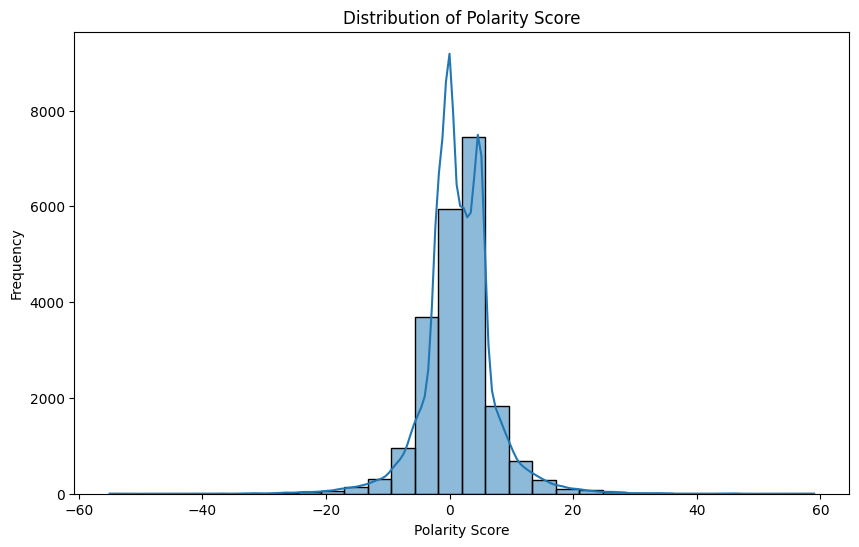

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df['polarity_score'], bins=30, kde=True)
plt.title('Distribution of Polarity Score')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()

Menampilkan diagram lingkaran untuk memudahkan visualisasi pembagian dataset.

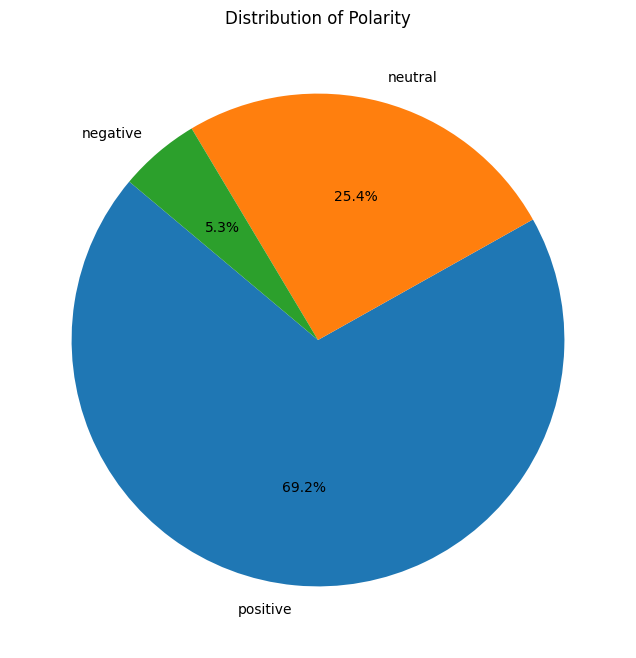

In [41]:
# Hitung jumlah masing-masing kategori polaritas
polarity_counts = df['polarity'].value_counts()

# Menampilkan diagram lingkaran
plt.figure(figsize=(8, 8))
plt.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Polarity')
plt.show()

Melihat Informasi DataFrame

In [42]:
# melihat informasi dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21688 entries, 0 to 29998
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              21688 non-null  object
 1   userName              21688 non-null  object
 2   userImage             21688 non-null  object
 3   content               21688 non-null  object
 4   score                 21688 non-null  int64 
 5   thumbsUpCount         21688 non-null  int64 
 6   reviewCreatedVersion  21688 non-null  object
 7   at                    21688 non-null  object
 8   replyContent          21688 non-null  object
 9   repliedAt             21688 non-null  object
 10  appVersion            21688 non-null  object
 11  text_Clean            21688 non-null  object
 12  text_Normalization    21688 non-null  object
 13  text_StopWord         21688 non-null  object
 14  text_Tokenization     21688 non-null  object
 15  text_Stemmindo        21688 non-null  obj

Menyimpan Hasil Preprocessing ke File CSV

In [43]:
# Menyimpan DataFrame hasil preprocessing ke file CSV
df.to_csv('/content/hasil_PreProcessing_apk_shopee.csv', index=False)

Membaca Kembali File Hasil Preprocessing

In [44]:
# Membaca file CSV hasil preprocessing ke dalam DataFrame
df = pd.read_csv('/content/hasil_PreProcessing_apk_shopee.csv')

In [45]:
from google.colab import files
files.download('/content/hasil_PreProcessing_apk_shopee.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
df.head(20)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_Clean,text_Normalization,text_StopWord,text_Tokenization,text_Stemmindo,text_String,polarity_score,polarity
0,9868ccf0-c62f-4794-a005-f1b6f7fe8727,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,keren,5,0,2.98.10,2025-04-06 04:47:03,"Hii kak Abdul Roni Parman, makasih ya buat rev...",2025-04-06 05:37:39,2.98.10,keren,keren,keren,['keren'],['keren'],keren,0,positive
1,4165e35f-cc40-48c1-8c08-22f444f339db,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap,4,0,3.47.39,2025-04-06 04:45:34,"Hi Kak Denz_ Ragil06 , terimakasih ya bintangn...",2025-04-06 05:40:54,3.47.39,mantap,mantap,mantap,['mantap'],['mantap'],mantap,5,positive
2,09209647-8db6-4eab-8e6f-f99d9abf2689,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat membantu sekali,5,0,3.46.37,2025-04-06 04:44:39,"Hi Kak Ahmad Fauzen , makasih ya buat bintang ...",2025-04-06 05:44:56,3.46.37,sangat membantu sekali,sangat membantu sekali,membantu,['membantu'],['bantu'],bantu,-1,neutral
3,8bce6afc-4580-4dda-9967-b45ff12dddf4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat baik makasih shopee,5,0,3.46.37,2025-04-06 04:44:28,"Hi Kak Martawi Tawi , makasih ya buat bintang ...",2025-04-06 05:08:59,3.46.37,sangat baik makasih shopee,sangat baik terima kasih shopee,terima kasih shopee,"['terima', 'kasih', 'shopee']","['terima', 'kasih', 'shopee']",terima kasih shopee,3,positive
4,138be952-72b4-466c-aac0-40c4446f791c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,belanja di shopee untung nyah banyak,4,0,3.45.60,2025-04-06 04:44:16,"Hi Kak Wawan Hermawan , terimakasih ya bintang...",2025-04-06 05:03:13,3.45.60,belanja di shopee untung nyah banyak,belanja di shopee untung nya banyak,belanja shopee untung nya,"['belanja', 'shopee', 'untung', 'nya']","['belanja', 'shopee', 'untung', 'nya']",belanja shopee untung,1,positive
5,2d50bd75-efc3-4658-bbca-93190ce26946,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,oke,5,0,3.47.39,2025-04-06 04:43:40,"Hi Kak Hahahh J , makasih ya buat bintang nya....",2025-04-06 05:45:21,3.47.39,oke,oke,oke,['oke'],['oke'],NaN,2,positive
6,c2469312-3a40-44b7-bb1a-55f1b369bc34,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,seneng bangedd bisa belanja di siniii🤩🤩,5,0,3.47.39,2025-04-06 04:43:32,"Hai kak laila optimis , makasih ya untuk binta...",2025-04-06 05:44:34,3.47.39,seneng bangedd bisa belanja di siniii🤩🤩,senang banget bisa belanja di siniii🤩🤩,senang banget belanja siniii🤩🤩,"['senang', 'banget', 'belanja', 'siniii']","['senang', 'banget', 'belanja', 'siniii']",senang banget belanja siniii,1,positive
7,4925f918-4105-4c82-86a7-a9d1e02c5b0a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"maaf kak pengiriman SPX gimana sih, masa sudah...",1,0,3.47.39,2025-04-06 04:41:35,"Hi Kak Bang Ndra , maaf ya udah bikin kakak ng...",2025-04-06 05:08:04,3.47.39,maaf kak pengiriman spx gimana sih masa sudah ...,maaf kak pengiriman spx bagaimana sih masa sud...,maaf kak pengiriman spx sih tujuan jakarta cak...,"['maaf', 'kak', 'pengiriman', 'spx', 'sih', 't...","['maaf', 'kak', 'kirim', 'spx', 'sih', 'tuju',...",maaf kirim tuju jakarta cakung banget kirim,3,positive
8,9be9e1b7-53cc-4b24-a26f-c29ba4b32ade,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap,5,0,3.46.37,2025-04-06 04:41:25,"Hi Kak Jecky Prabowo , makasih ya buat bintang...",2025-04-06 05:24:42,3.46.37,mantap,mantap,mantap,['mantap'],['mantap'],mantap,5,positive
9,93dd141a-5ed5-4b28-9481-00139fc0ecbd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kargo udah ga gratis,1,0,3.46.37,2025-04-06 04:41:10,"Hi kak Dharma Yanti, mohon maaf atas ketidakny...",2025-04-06 05:23:56,3.46.37,kargo udah ga gratis,kargo sudah tidak gratis,kargo gratis,"['kargo', 'gratis']","['kargo', 'gratis']",kargo gratis,4,positive


Melihat kolom Hasil Preprocessing

In [47]:
# Menampilkan kolom 'text_String' untuk melihat hasil penggabungan token
df['text_String'].head(5)

,text_String
0,keren
1,mantap
2,bantu
3,terima kasih shopee
4,belanja shopee untung


Word cloud umum, Membuat wordcloud dari dataset tanpa melihat label.

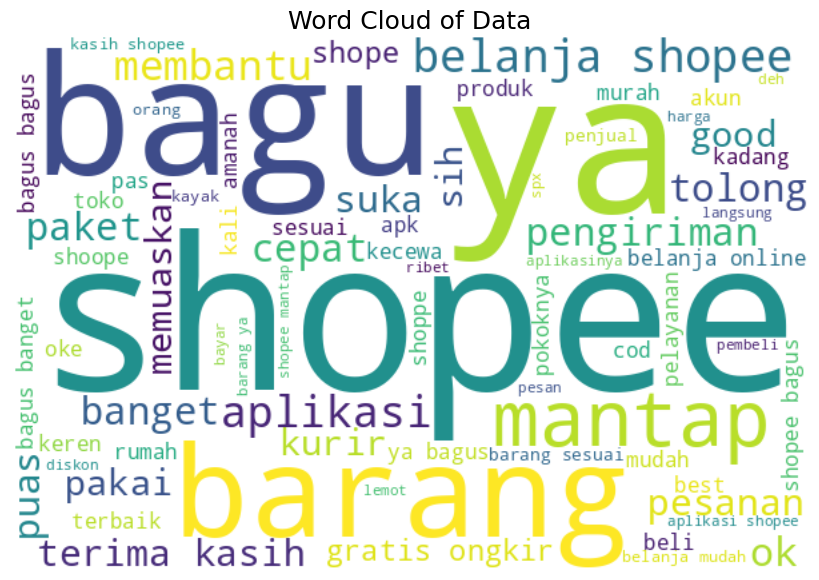

In [48]:

# Menggabungkan seluruh teks dari kolom 'text_StopWord'
# Mengisi nilai NaN dengan string kosong dan mengkonversi semua nilai ke string
all_text = ' '.join(df['text_StopWord'].fillna('').astype(str))

# Membuat word cloud dari teks yang telah digabungkan
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(all_text)

# Menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Data', fontsize=18)
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
plt.tight_layout(pad=0)
plt.show()

DataFrame untuk Word Cloud Positive

In [49]:
# Menampilkan kolom dengan lebar maksimum (opsional)
pd.set_option('display.max_colwidth', 3000)

# Buat DataFrame untuk tweet dengan label 'positive'
positive_tweets = df[df['polarity'] == 'positive']

# Pilih kolom yang relevan; sesuaikan dengan DataFrame Anda
# Di sini saya menggunakan 'text_String' (hasil gabungan token) dan 'text_StopWord' sebagai teks yang telah diproses
positive_tweets = positive_tweets[['text_String', 'polarity_score', 'polarity', 'text_StopWord']]

# Urutkan berdasarkan skor polaritas secara menurun (nilai tertinggi di atas)
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)
positive_tweets = positive_tweets.reset_index(drop=True)
positive_tweets.index += 1

# Untuk verifikasi, Anda dapat menampilkan beberapa baris dari positive_tweets
print(positive_tweets.head())

                                                                                                                                                                                                                                                                                 text_String  \
1                                       tolong shopee belanja harga tera paket biar kayak ribet susah nempelin harga paket psen keti kurir harga paket suka sesuai harga kurir suka catet pakai pulpen harga pesan kadang suka sebel kadang suka iklas kembali tautau harga beda jujur kurir   
2  belanja online komplit kadang murah kadang mahal gantung toko kadang jual amanah licik beli brang sesuai kadang brang dpesan barang amanah suka mood depan shopee tolong amanah blacklist ngerugiin beli ngabisin chat jual kadang slow respon balas moga shopee coreng toko amanah licik   
3                                        langgan shope shope nyaman blanja online mudah diskon lemari beli shope jasa kirim order lemari

Word Cloud Positive

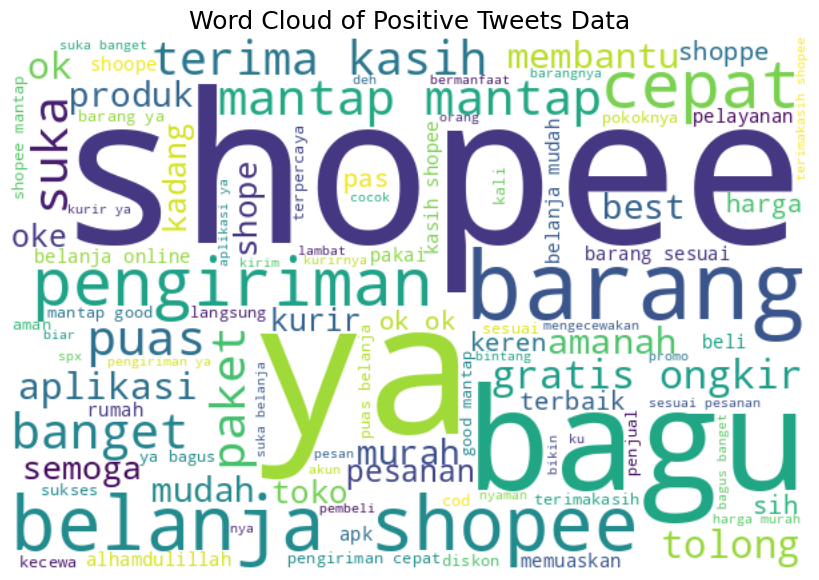

In [50]:
# Menggabungkan seluruh teks dari kolom 'text_StopWord' pada DataFrame positive_tweets
all_positive_text = ' '.join(positive_tweets['text_StopWord'].fillna('').astype(str))

# Membuat word cloud dari teks yang telah digabungkan
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(all_positive_text)

# Menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
plt.tight_layout(pad=0)
plt.show()

DataFrame untuk Word Cloud Negative

In [51]:
# Menampilkan kolom dengan lebar maksimum (opsional)
pd.set_option('display.max_colwidth', 3000)

# Ambil subset tweet dengan label 'negative'
negative_tweets = df[df['polarity'] == 'negative']

# Pilih kolom yang relevan; sesuaikan dengan nama kolom yang ada (misalnya 'text_String' dan 'text_StopWord')
negative_tweets = negative_tweets[['text_String', 'polarity_score', 'polarity', 'text_StopWord']]

# Urutkan berdasarkan skor polaritas secara menurun
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=False)
negative_tweets = negative_tweets.reset_index(drop=True)
negative_tweets.index += 1

# Tampilkan beberapa baris untuk verifikasi
print(negative_tweets.head())

                                                                                                                 text_String  \
1                                                         aplikasi belanja worth suka mager mana wkwk apalagibanyak promonya   
2                                                         adeh orang guna beli pakai voucher kena langgar nomor blokir hadeh   
3                                                                    akibat kemaruk shope alih ekpedisi overload tiap hubung   
4                                                                                                                 bagus ngen   
5  kapasitas video upload klaim kirim video google drive timbang kait investigasi kirim barang elektronik kendara motor roda   

   polarity_score  polarity  \
1              -7  negative   
2              -7  negative   
3              -7  negative   
4              -7  negative   
5              -7  negative   

                                            

Word Cloud untuk Label Negative

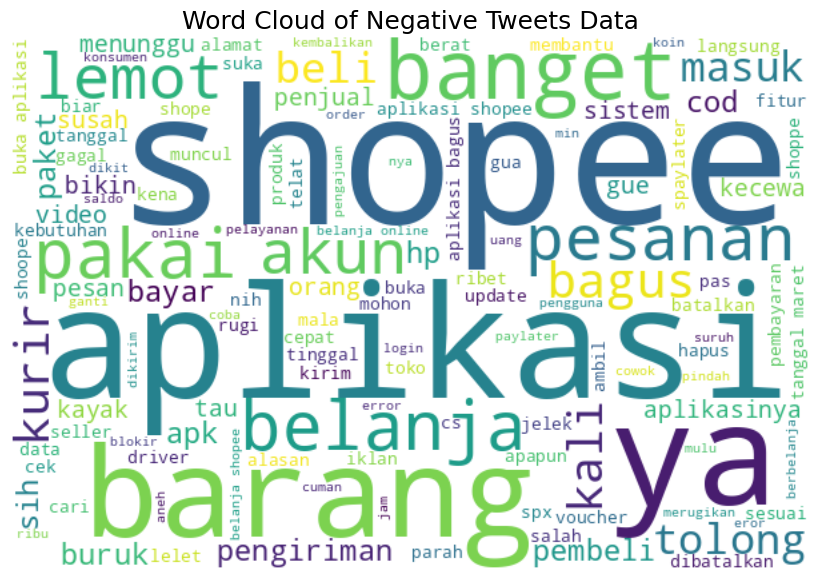

In [52]:
# Gabungkan seluruh teks dari kolom 'text_StopWord' pada DataFrame negative_tweets
all_negative_text = ' '.join(negative_tweets['text_StopWord'].fillna('').astype(str))

# Buat word cloud dari teks yang telah digabungkan
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(all_negative_text)

# Tampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
plt.tight_layout(pad=0)
plt.show()

DataFrame untuk Word Cloud Neutral

In [53]:
# Menampilkan kolom dengan lebar maksimum (opsional)
pd.set_option('display.max_colwidth', 3000)

# Ambil subset tweet dengan label 'neutral'
neutral_tweets = df[df['polarity'] == 'neutral']

# Pilih kolom yang relevan, misalnya 'text_String' dan 'text_StopWord'
neutral_tweets = neutral_tweets[['text_String', 'polarity_score', 'polarity', 'text_StopWord']]

# Urutkan berdasarkan skor polaritas secara menurun
neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=False)
neutral_tweets = neutral_tweets.reset_index(drop=True)
neutral_tweets.index += 1

# Tampilkan beberapa baris untuk verifikasi
print(neutral_tweets.head())

                                                                    text_String  \
1                                                                         bantu   
2                                                                         bantu   
3                                                                         bantu   
4  mending lazada shoppe jiirr barang medan pakpak bharat gaakk bangkee bangkee   
5                                                                         bantu   

   polarity_score polarity  \
1              -1  neutral   
2              -1  neutral   
3              -1  neutral   
4              -1  neutral   
5              -1  neutral   

                                                                          text_StopWord  
1                                                                              membantu  
2                                                                              membantu  
3                                                 

Word Cloud untuk Label Neutral

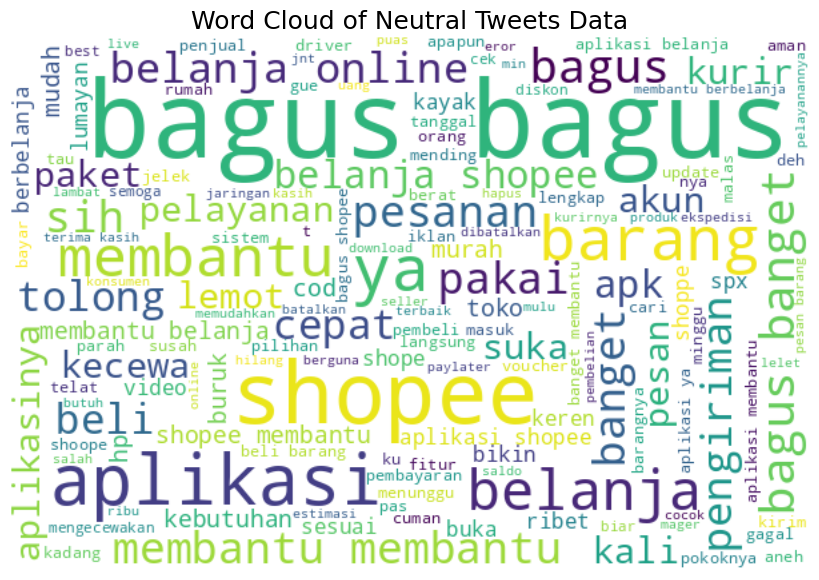

In [54]:
# Menggabungkan seluruh teks dari kolom 'text_StopWord' pada DataFrame neutral_tweets
all_neutral_text = ' '.join(neutral_tweets['text_StopWord'].fillna('').astype(str))

# Membuat word cloud dari teks yang telah digabungkan
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(all_neutral_text)

# Menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Neutral Tweets Data', fontsize=18)
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
plt.tight_layout(pad=0)
plt.show()

Melihat Distribusi Panjang Teks

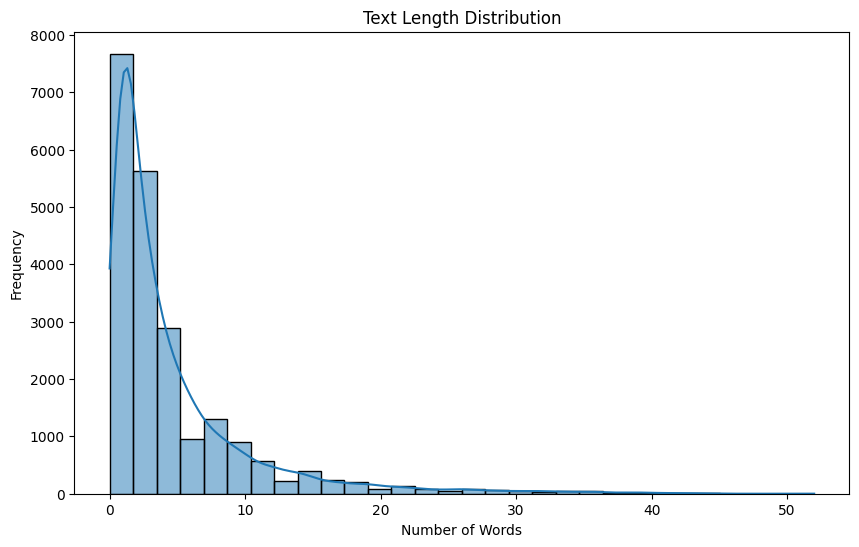

In [55]:
# Pastikan kolom 'text_String' tidak memiliki nilai NaN dan berupa string
df['text_String'] = df['text_String'].fillna('').astype(str)

# Set ukuran figure
plt.figure(figsize=(10, 6))

# Menghitung panjang teks berdasarkan jumlah kata pada kolom 'text_String'
df['text_length'] = df['text_String'].apply(lambda x: len(x.split()))

# Visualisasikan distribusi panjang teks
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

Melihat Kata yang Paling Sering Muncul

<ipython-input-56-e293a6b9803b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='jumlah', y='index', data=tfidf_top20, palette='viridis')


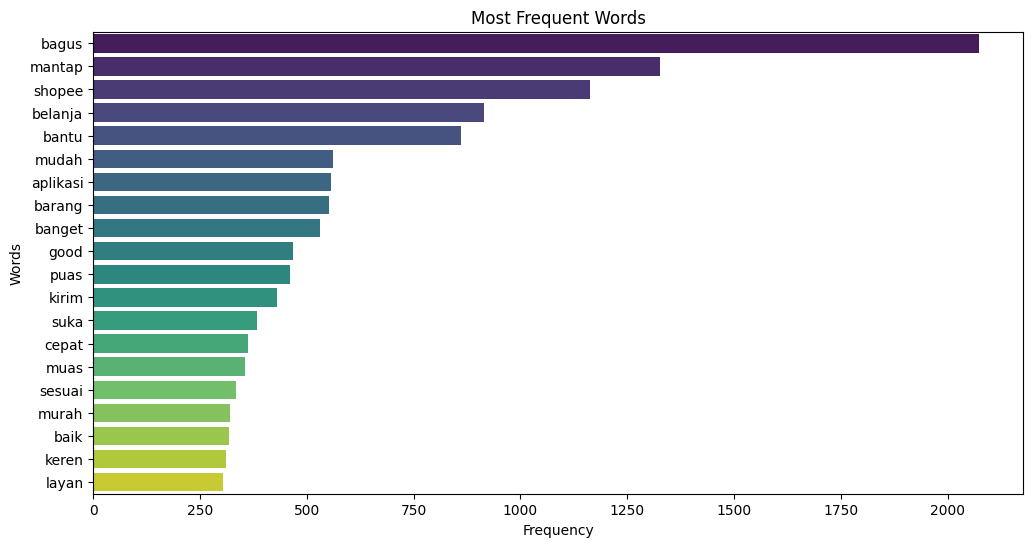

In [56]:
# Pastikan kolom 'text_String' sudah bersih dari NaN dan berupa string
df['text_String'] = df['text_String'].fillna('').astype(str)

# Set ukuran figure
plt.figure(figsize=(12, 6))

# Menggunakan TfidfVectorizer untuk menghitung frekuensi kata pada kolom 'text_String'
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text_String'])

# Membuat DataFrame TF-IDF
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Menjumlahkan setiap kata di seluruh dokumen
tfidf_sum = tfidf_df.sum().reset_index(name='jumlah')

# Mengurutkan dan mengambil 20 kata dengan frekuensi tertinggi
tfidf_top20 = tfidf_sum.sort_values('jumlah', ascending=False).head(20)

# Menampilkan diagram batang
sns.barplot(x='jumlah', y='index', data=tfidf_top20, palette='viridis')
plt.title('Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

# Pemodelan (Modeling)
Pembuatan model dilakukan dengan mencoba tiga skema pelatihan yang berbeda, yang masing-masing dibedakan berdasarkan dua kombinasi variasi, seperti di bawah ini:


1. Algoritma Pelatihan: LSTM
Pembagian Data: Training 70, val 20, test 10

2. Algoritma Pelatihan: CNN
Pembagian Data: Training 80, val 10, test 10

3. Algoritma Pelatihan: GRU
Pembagian Data: Training 90, val 5, test 5



Kolom text_akhir dijadikan sebagai fitur dan kolom polarity dijadikan sebagai target.

In [57]:
# Mengambil kolom fitur dan target
# Menggunakan kolom 'text_String' sebagai teks akhir yang sudah diproses
X = df['text_String']
y = df['polarity']

# Tampilkan 5 baris pertama untuk verifikasi
print(X.head())
print(y.head())

0                    keren
1                   mantap
2                    bantu
3      terima kasih shopee
4    belanja shopee untung
Name: text_String, dtype: object
0    positive
1    positive
2     neutral
3    positive
4    positive
Name: polarity, dtype: object


 Melakukan tokenisasi.


Tokenizer: Mengatur tokenizer dengan batas maksimal 2500 kata, lalu mengonversi teks dari kolom text_String menjadi urutan angka. Setelah itu, digunakan padding agar seluruh urutan memiliki panjang yang seragam.

LabelEncoder & to_categorical: Label dari kolom polarity diubah menjadi angka menggunakan LabelEncoder, lalu dikonversi lagi menjadi vektor one-hot encoding.

num_classes: Menentukan jumlah kelas berdasarkan panjang dari vektor one-hot encoding pada variabel y.

In [58]:
# Tokenisasi
max_features = 2500
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X.values)  # X berasal dari df['text_String']
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)

# Label encoding untuk target y
labelencoder = LabelEncoder()
integer_encoded = labelencoder.fit_transform(y)  # y berasal dari df['polarity']
y = to_categorical(integer_encoded)

# Menentukan jumlah kelas
num_classes = y.shape[1]

print("Shape of tokenized sequences:", X.shape)
print("Shape of target labels:", y.shape)
print("Number of classes:", num_classes)

Shape of tokenized sequences: (21688, 49)
Shape of target labels: (21688, 3)
Number of classes: 3


In [59]:
import pickle

# Simpan tokenizer ke file
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Tokenizer berhasil disimpan.")


Tokenizer berhasil disimpan.


Mendefinisikan callbacks yang akan berhenti jika nilai akurasi pelatihan > 0.95.

In [58]:
import tensorflow as tf

class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Pastikan nilai accuracy tersedia dan jika lebih dari 0.95, hentikan pelatihan
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.95:
            print(f"\nTraining accuracy telah melebihi 0.95, menghentikan pelatihan pada epoch {epoch+1}")
            self.model.stop_training = True

early_stopping = EarlyStopping(
    monitor='val_loss',         # atau bisa juga 'val_accuracy'
    patience=3,                 # berhenti setelah 3 epoch tanpa perbaikan
    restore_best_weights=True, # ambil bobot terbaik, bukan yang terakhir
    verbose=1
)

##  LSTM

Memisahkan Data Latih, Validasi, dan Uji

In [59]:
# Membagi dataset: 10% untuk uji, sisanya untuk train+validation
X_train_val, X_test_LSTM, y_train_val, y_test_LSTM = train_test_split(X, y, test_size=0.1, random_state=42)

# Dari train+validation, ambil 20% sebagai validation (total: 70% training, 20% validation, 10% testing)
X_train_LSTM, X_val_LSTM, y_train_LSTM, y_val_LSTM = train_test_split(X_train_val, y_train_val, test_size=2/9, random_state=42)

print("Shape X_train_LSTM:", X_train_LSTM.shape)
print("Shape X_val_LSTM:", X_val_LSTM.shape)
print("Shape X_test_LSTM:", X_test_LSTM.shape)

Shape X_train_LSTM: (15181, 49)
Shape X_val_LSTM: (4338, 49)
Shape X_test_LSTM: (2169, 49)


Membangun model LSTM

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Membangun model LSTM
model_LSTM = Sequential()
model_LSTM.add(Embedding(max_features, 256, input_length=X.shape[1]))
model_LSTM.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01), return_sequences=True))
model_LSTM.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01)))
model_LSTM.add(Dense(128, activation='relu'))
model_LSTM.add(Dense(64, activation='relu'))
model_LSTM.add(Dense(num_classes, activation='softmax'))

model_LSTM.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

model_LSTM.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Melatih dan Mengevaluasi Model

In [61]:
# Melatih model dengan early stopping kustom (misalnya: berhenti jika akurasi training > 0.95)
batch_size = 2056
history_LSTM = model_LSTM.fit(
    X_train_LSTM, y_train_LSTM,
    epochs=50,
    batch_size=batch_size,
    verbose=2,
    callbacks=[early_stopping],
    validation_data=(X_val_LSTM, y_val_LSTM)
)

# Evaluasi model pada data uji
score_LSTM, acc_LSTM = model_LSTM.evaluate(X_test_LSTM, y_test_LSTM, verbose=2)
print("Test score: %.2f" % score_LSTM)
print("Test accuracy: %.2f" % acc_LSTM)

Epoch 1/50
8/8 - 63s - 8s/step - accuracy: 0.6516 - loss: 5.5571 - val_accuracy: 0.6943 - val_loss: 4.7553
Epoch 2/50
8/8 - 38s - 5s/step - accuracy: 0.6924 - loss: 4.3785 - val_accuracy: 0.6943 - val_loss: 3.8185
Epoch 3/50
8/8 - 37s - 5s/step - accuracy: 0.6924 - loss: 3.5088 - val_accuracy: 0.6943 - val_loss: 3.0662
Epoch 4/50
8/8 - 40s - 5s/step - accuracy: 0.6924 - loss: 2.8166 - val_accuracy: 0.6943 - val_loss: 2.4713
Epoch 5/50
8/8 - 40s - 5s/step - accuracy: 0.6924 - loss: 2.2789 - val_accuracy: 0.6943 - val_loss: 2.0118
Epoch 6/50
8/8 - 38s - 5s/step - accuracy: 0.6924 - loss: 1.8614 - val_accuracy: 0.6948 - val_loss: 1.6489
Epoch 7/50
8/8 - 36s - 4s/step - accuracy: 0.6949 - loss: 1.5233 - val_accuracy: 0.7019 - val_loss: 1.3172
Epoch 8/50
8/8 - 41s - 5s/step - accuracy: 0.7361 - loss: 1.2058 - val_accuracy: 0.8280 - val_loss: 1.0033
Epoch 9/50
8/8 - 42s - 5s/step - accuracy: 0.8308 - loss: 0.9340 - val_accuracy: 0.8407 - val_loss: 0.8221
Epoch 10/50
8/8 - 40s - 5s/step - acc

#### Evaluasi

In [124]:
print("Test score: %.2f" % score_LSTM)
print("Test accuracy: %.2f" % acc_LSTM)

Test score: 0.29
Test accuracy: 0.92


Menyimpan Model

In [63]:
# Simpan model di Colab sementara
model_LSTM.save('model_LSTM.h5')

# Unduh model ke komputer
files.download('model_LSTM.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## CNN

Split data

In [64]:
# Memisahkan data latih, validasi, dan uji untuk model CNN
X_train_val, X_test_CNN, y_train_val, y_test_CNN = train_test_split(X, y, test_size=0.1, random_state=42)
X_train_CNN, X_val_CNN, y_train_CNN, y_val_CNN = train_test_split(X_train_val, y_train_val, test_size=1/9, random_state=42)

print("Shape X_train_CNN:", X_train_CNN.shape)
print("Shape X_val_CNN:", X_val_CNN.shape)
print("Shape X_test_CNN:", X_test_CNN.shape)

Shape X_train_CNN: (17350, 49)
Shape X_val_CNN: (2169, 49)
Shape X_test_CNN: (2169, 49)


Membuat Model CNN

In [65]:
# Membangun model CNN
model_CNN = Sequential()
model_CNN.add(Embedding(max_features, 512, input_length=X.shape[1]))
model_CNN.add(Conv1D(64, kernel_size=5, activation='relu'))
model_CNN.add(MaxPooling1D(pool_size=2))
model_CNN.add(Flatten())
model_CNN.add(Dense(64, activation='relu'))
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(num_classes, activation='softmax'))

model_CNN.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model_CNN.summary()

# Melatih model dengan early stopping kustom
batch_size = 2056
history_CNN = model_CNN.fit(
    X_train_CNN, y_train_CNN,
    epochs=50,
    batch_size=batch_size,
    verbose=2,
    callbacks=[early_stopping],
    validation_data=(X_val_CNN, y_val_CNN)
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
9/9 - 29s - 3s/step - accuracy: 0.6071 - loss: 0.8784 - val_accuracy: 0.6943 - val_loss: 0.7639
Epoch 2/50
9/9 - 49s - 5s/step - accuracy: 0.6907 - loss: 0.7724 - val_accuracy: 0.6943 - val_loss: 0.7294
Epoch 3/50
9/9 - 26s - 3s/step - accuracy: 0.6917 - loss: 0.7448 - val_accuracy: 0.6962 - val_loss: 0.7074
Epoch 4/50
9/9 - 30s - 3s/step - accuracy: 0.6981 - loss: 0.7196 - val_accuracy: 0.7003 - val_loss: 0.6833
Epoch 5/50
9/9 - 27s - 3s/step - accuracy: 0.7070 - loss: 0.6875 - val_accuracy: 0.7082 - val_loss: 0.6450
Epoch 6/50
9/9 - 27s - 3s/step - accuracy: 0.7159 - loss: 0.6425 - val_accuracy: 0.7178 - val_loss: 0.6105
Epoch 7/50
9/9 - 41s - 5s/step - accuracy: 0.7301 - loss: 0.5992 - val_accuracy: 0.7271 - val_loss: 0.5793
Epoch 8/50
9/9 - 41s - 5s/step - accuracy: 0.7513 - loss: 0.5628 - val_accuracy: 0.7432 - val_loss: 0.5578
Epoch 9/50
9/9 - 40s - 4s/step - accuracy: 0.7654 - loss: 0.5393 - val_accuracy: 0.7469 - val_loss: 0.5559
Epoch 10/50
9/9 - 27s - 3s/step - acc

### Evaluasi

In [66]:
# Evaluasi model CNN pada data uji
score_CNN, acc_CNN = model_CNN.evaluate(X_test_CNN, y_test_CNN, verbose=2, batch_size=1028)
print("Test score: %.2f" % score_CNN)
print("Test accuracy: %.2f" % acc_CNN)

3/3 - 1s - 278ms/step - accuracy: 0.7506 - loss: 0.9638
Test score: 0.96
Test accuracy: 0.75


Menymoan model

In [67]:

# Simpan model di Colab sementara
model_CNN.save('model_CNN.h5')

# Unduh model ke komputer
files.download('model_CNN.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## GRU

In [76]:
# Memisahkan data latih, validasi, dan uji untuk model GRU
X_train_val, X_test_GRU, y_train_val, y_test_GRU = train_test_split(X, y, test_size=0.05, random_state=42)
X_train_GRU, X_val_GRU, y_train_GRU, y_val_GRU = train_test_split(X_train_val, y_train_val, test_size=0.0526, random_state=42)

print("Shape X_train_GRU:", X_train_GRU.shape)
print("Shape X_val_GRU:", X_val_GRU.shape)
print("Shape X_test_GRU:", X_test_GRU.shape)

Shape X_train_GRU: (19519, 49)
Shape X_val_GRU: (1084, 49)
Shape X_test_GRU: (1085, 49)


Model GRU

In [107]:
# Membangun model GRU
model_GRU = Sequential()
model_GRU.add(Embedding(max_features, 512, input_length=X.shape[1]))
model_GRU.add(SpatialDropout1D(0.3))
model_GRU.add(Bidirectional(GRU(64, return_sequences=True)))
model_GRU.add(Bidirectional(GRU(128, return_sequences=False)))
model_GRU.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model_GRU.add(Dropout(0.5))
model_GRU.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model_GRU.add(Dropout(0.5))
model_GRU.add(Dense(num_classes, activation='softmax'))

model_GRU.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model_GRU.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_10                 │ ?                           │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_16 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_17 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Evaluasi

In [113]:
batch_size = 1028
history_GRU = model_GRU.fit(
    X_train_GRU, y_train_GRU,
    epochs=20,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val_GRU, y_val_GRU),
    callbacks=[early_stopping]
)


Epoch 1/20

Training accuracy telah melebihi 0.95, menghentikan pelatihan pada epoch 1
19/19 - 92s - 5s/step - accuracy: 0.9583 - loss: 0.1959 - val_accuracy: 0.8939 - val_loss: 0.3425


In [116]:
# Evaluasi model GRU pada data uji
score_GRU, acc_GRU = model_GRU.evaluate(X_test_GRU, y_test_GRU, verbose=2)

34/34 - 2s - 53ms/step - accuracy: 0.9171 - loss: 0.3022


In [117]:
print("Test score: %.2f" % score_GRU)
print("Test accuracy: %.2f" % acc_GRU)

Test score: 0.30
Test accuracy: 0.92


Menyimpan Model

In [85]:

# Simpan model di Colab sementara
model_GRU.save('model_GRU.h5')

# Unduh model ke komputer
files.download('model_GRU.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Memprediksi Label pada Data Baru

In [125]:
# Contoh data baru Shopee dengan variasi sentimen
new_texts = [
    "Pengalaman belanja yang menyenangkan, barang cepat sampai dan kualitas bagus",  # positif
    "Aplikasi sering error dan customer service lambat tanggapannya, sangat mengecewakan",  # negatif
    "belum optimal tetapi lumayan bagus",  # netral
]


In [126]:
# Nilai asli dari teks
true_labels = ["positive", "negative", "neutral"]

# Tokenisasi dan padding untuk data baru
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded_sequences = pad_sequences(new_sequences, maxlen=X.shape[1])

# Membuat prediksi menggunakan ketiga model
predictions_LSTM = model_LSTM.predict(new_padded_sequences)
predictions_CNN = model_CNN.predict(new_padded_sequences)
predictions_GRU = model_GRU.predict(new_padded_sequences)

# Mengubah prediksi ke label (menggunakan argmax)
predicted_labels_LSTM = np.argmax(predictions_LSTM, axis=1)
predicted_labels_CNN = np.argmax(predictions_CNN, axis=1)
predicted_labels_GRU = np.argmax(predictions_GRU, axis=1)

# Mengonversi label integer ke label asli menggunakan labelencoder
predicted_labels_LSTM = labelencoder.inverse_transform(predicted_labels_LSTM)
predicted_labels_CNN = labelencoder.inverse_transform(predicted_labels_CNN)
predicted_labels_GRU = labelencoder.inverse_transform(predicted_labels_GRU)

# Menampilkan hasil prediksi
for text, true_label, label_LSTM, label_CNN, label_GRU in zip(new_texts, true_labels, predicted_labels_LSTM, predicted_labels_CNN, predicted_labels_GRU):
    print(f"Text: {text}\nTrue Label: {true_label}\nPredicted Label (LSTM): {label_LSTM}\nPredicted Label (CNN): {label_CNN}\nPredicted Label (GRU): {label_GRU}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Text: Pengalaman belanja yang menyenangkan, barang cepat sampai dan kualitas bagus
True Label: positive
Predicted Label (LSTM): positive
Predicted Label (CNN): positive
Predicted Label (GRU): neutral

Text: Aplikasi sering error dan customer service lambat tanggapannya, sangat mengecewakan
True Label: negative
Predicted Label (LSTM): negative
Predicted Label (CNN): negative
Predicted Label (GRU): negative

Text: belum optimal tetapi lumayan bagus
True Label: neutral
Predicted Label (LSTM): neutral
Predicted Label (CNN): neutral
Predicted Label (GRU): neutral

